In [2]:
import numpy as np
import scrapePM as spm
from bs4 import BeautifulSoup
import urllib
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
import csv
def save_pairs(filename, terms, pairs):
    # saves pair counts as csv, with header row as terms
    with open(filename, 'wb') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(terms)
        for row in pairs:
            writer.writerow(row)

In [4]:
counts = pandas.read_csv('../data/term_counts_pubmed.csv')

In [5]:
def threshed_terms(counts, cat, thresh=0.001):
    # return the thresholded list of terms for further processing
    return [t for t in counts[counts[cat]/counts[cat][0]>=thresh][1:]['term']]        

In [6]:
# scrape neuro method pairs in pubmed
neumet_list = threshed_terms(counts, 'neu_methods')
base_phrase = ('AND('+
                '("fmri"OR"neuroimaging")OR'+
                '("pet"OR"positron emission tomography")OR'+
                '("eeg"OR"electroencephalography")OR'+
                '("meg"OR"magnetoencephalography")OR'+
                '("ecog"OR"electrocorticography")OR'+
                '("lfp"OR"local field potential")OR'+
                '("erp"OR"event related potential")OR'+
                '("single unit"OR"single-unit"OR"single neuron")OR'+
                '("calcium imaging")'
                ')')

neumet_pairs = spm.scrape_pairs(neumet_list, base_phrase=base_phrase, fieldkey='TIAB')
save_pairs('../data/paircount_neumet.csv', neumet_list, neumet_pairs)

action 1 / 175
activation 2 / 175
acuity 3 / 175
adaptation 4 / 175
addiction 5 / 175
agency 6 / 175
alveolar 7 / 175
anticipation 8 / 175
anxiety 9 / 175
appetite 10 / 175
arousal 11 / 175
association 12 / 175
attachment 13 / 175
attention 14 / 175
attentional resources 15 / 175
balance 16 / 175
behavioral inhibition (cognitive) 17 / 175
belief 18 / 175
categorization 19 / 175
cognitive control 20 / 175
cognitive development 21 / 175
communication 22 / 175
competition 23 / 175
concept 24 / 175
consciousness 25 / 175
consolidation 26 / 175
context 27 / 175
coordination 28 / 175
cueing 29 / 175
decision 30 / 175
decision making 31 / 175
declarative memory 32 / 175
desire 33 / 175
detection 34 / 175
discrimination 35 / 175
distraction 36 / 175
dyslexia 37 / 175
eating 38 / 175
efficiency 39 / 175
effort 40 / 175
emotion 41 / 175
emotion regulation 42 / 175
empathy 43 / 175
encoding 44 / 175
episodic memory 45 / 175
excitation 46 / 175
expectancy 47 / 175
expertise 48 / 175
extinction 49 

In [60]:
NMP = np.zeros(np.shape(neumet_pairs))
for i in range(np.shape(NMP)[0]):
    NMP[i,:] = np.roll(neumet_pairs[i, :],i)

NMP = np.triu(NMP,1)+np.transpose(NMP)
save_pairs('../data/NMP.csv', neumet_list, NMP)

/Users/rgao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


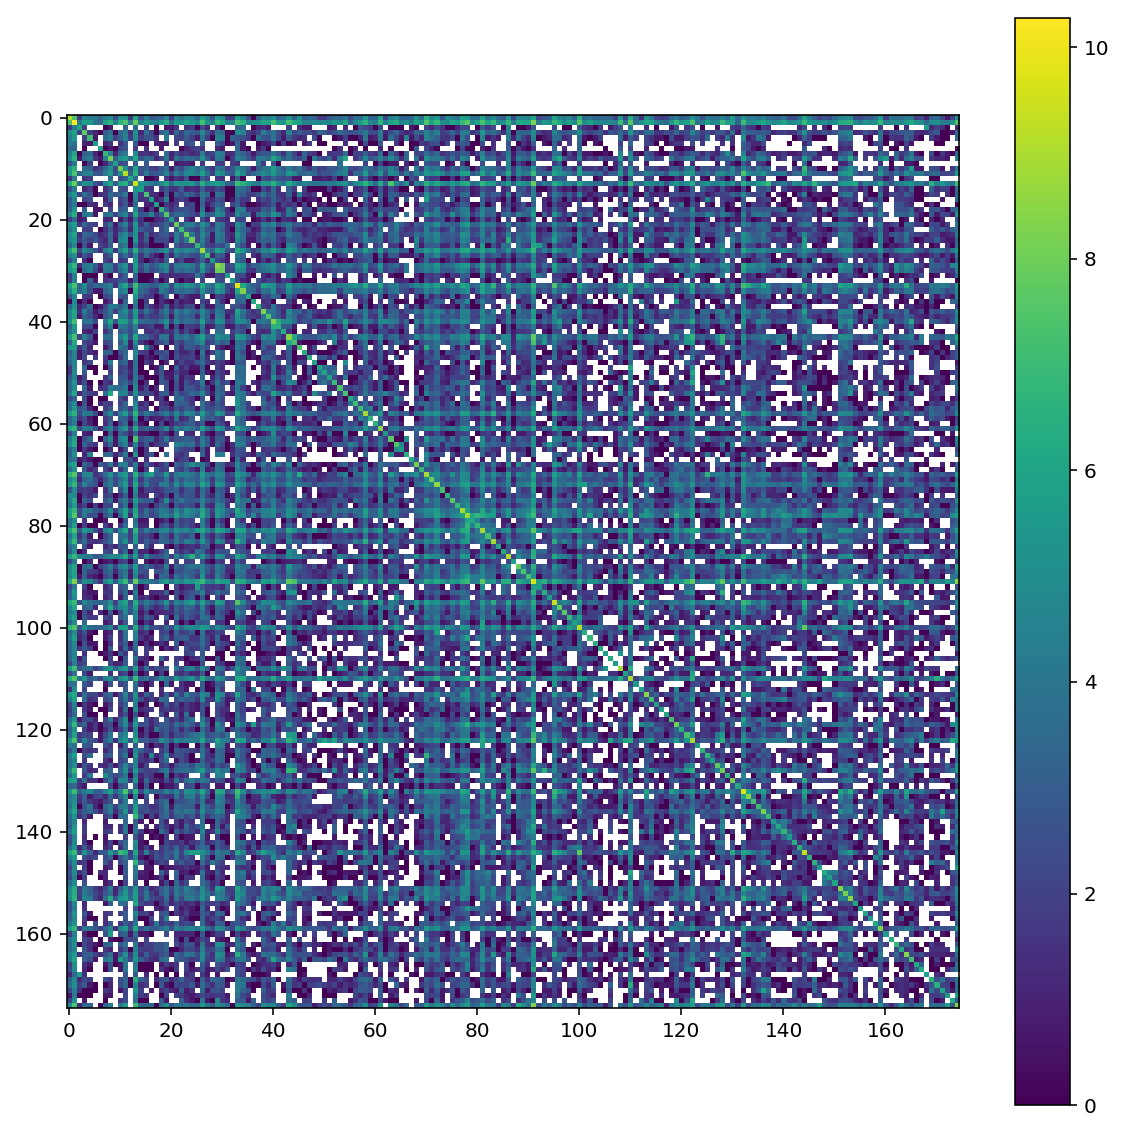

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(np.log(NMP))
plt.colorbar()

In [ ]:
# scrape general neuro pairs in pubmed
neu_list = threshed_terms(counts, 'neu')
base_phrase = 'AND("neural"OR"neuroscience")'
neu_pairs = spm.scrape_pairs(neu_list, base_phrase=base_phrase, fieldkey='TIAB')

In [ ]:
# scrape cog pairs in pubmed
cog_list = threshed_terms(counts, 'cog')
base_phrase = 'AND("cognitive"OR"cognition")'
cog_pairs = spm.scrape_pairs(cog_list, base_phrase=base_phrase, fieldkey='TIAB')